# MLP-based regression model

In [1]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/기계학습개론/20190120_Time_8_Altitude_22_Eastward_wind.csv')

df

,Longitude (deg),Latitude (deg),Eastward wind (m/s)
0,89,231,15.634
1,89,232,18.181
2,89,233,20.451
3,89,234,22.005
4,89,235,23.681
...,...,...,...
4942,185,277,46.580
4943,185,278,47.345
4944,185,279,48.517
4945,185,280,50.392


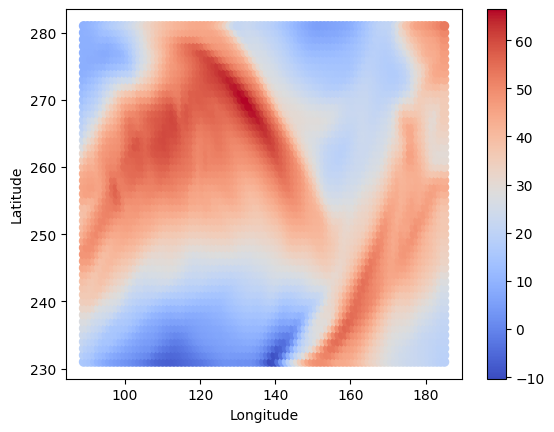

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df['Longitude (deg)'], df['Latitude (deg)'], c=df['Eastward wind (m/s)'], cmap='coolwarm')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

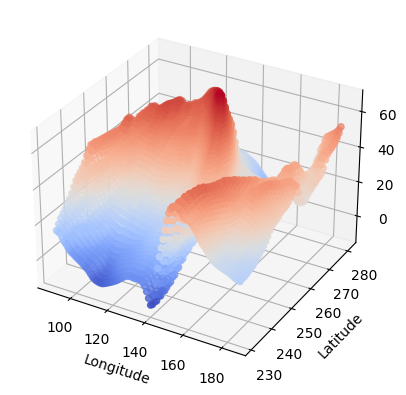

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Longitude (deg)'], df['Latitude (deg)'], df['Eastward wind (m/s)'], c=df['Eastward wind (m/s)'], cmap='coolwarm')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Eastward Wind')
plt.show()


Test error: 19.370736764624436
Test accuracy: 0.9672325438533618


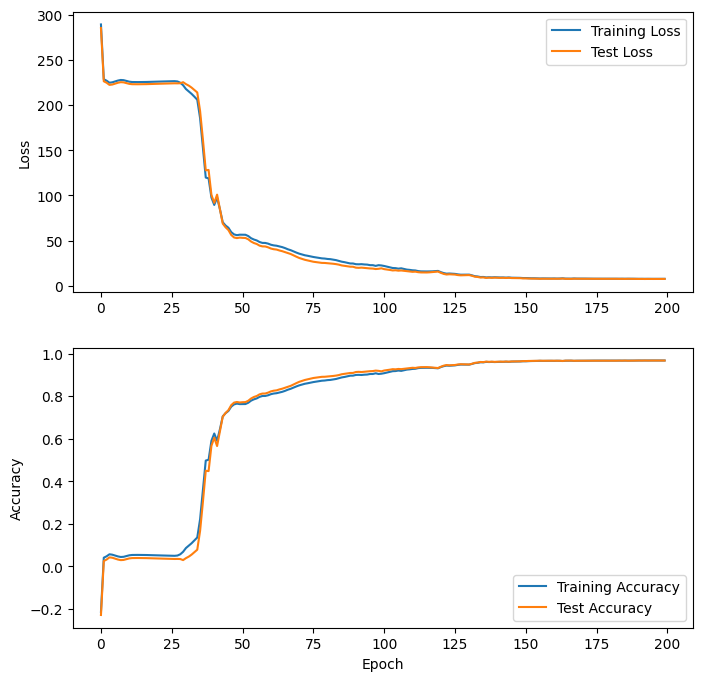

Train R-squared: 0.968
Test R-squared: 0.967


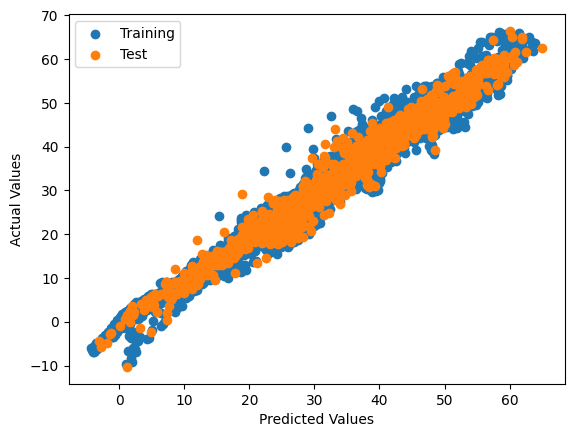

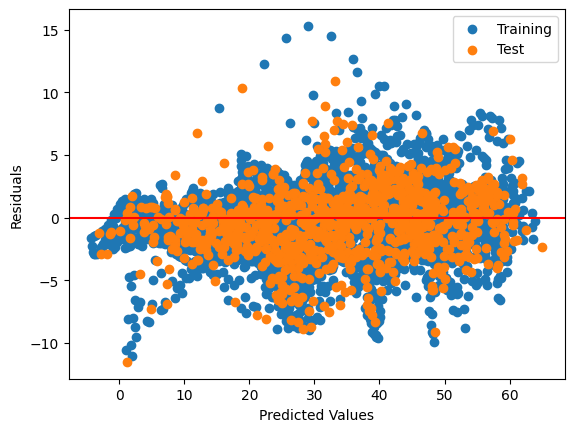

Train Model Representation Error: 8.114%
Test Model Representation Error: -0.391%


In [14]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
X = df[['Longitude (deg)', 'Latitude (deg)']]
y = df['Eastward wind (m/s)']


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP model
model = MLPRegressor(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', learning_rate='constant', learning_rate_init=0.1, max_iter=100, random_state=42)

# Train the model and record the error and accuracy at each epoch
training_loss = []
training_accuracy = []
test_loss = []
test_accuracy = []
for epoch in range(200):
    model.partial_fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    training_loss.append(mean_squared_error(y_train, y_train_pred))
    training_accuracy.append(model.score(X_train, y_train))
    y_test_pred = model.predict(X_test)
    test_loss.append(mean_squared_error(y_test, y_test_pred))
    test_accuracy.append(model.score(X_test, y_test))

# Calculate the test error
test_error = mean_squared_error(y_test, y_pred)
print("Test error:", test_error)

# Calculate the test accuracy
accuracy = model.score(X_test, y_test)
print("Test accuracy:", accuracy)


# Plot the training loss and accuracy over epochs
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(training_loss, label='Training Loss')
ax[0].plot(test_loss, label='Test Loss')
ax[0].set_ylabel("Loss")
ax[0].legend()
ax[1].plot(training_accuracy, label='Training Accuracy')
ax[1].plot(test_accuracy, label='Test Accuracy')
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].legend()
plt.show()

# Calculate the R-squared value
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Train R-squared: {:.3f}".format(train_r2))
print("Test R-squared: {:.3f}".format(test_r2))

# Create actual by predicted plot
plt.figure()
plt.scatter(y_train_pred, y_train, label='Training')
plt.scatter(y_test_pred, y_test, label='Test')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.show()

# Create residual by predicted plot
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred
plt.figure()
plt.scatter(y_train_pred, train_residuals, label='Training')
plt.scatter(y_test_pred, test_residuals, label='Test')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Compute the model representation error value
train_error = np.mean(np.abs(train_residuals) / y_train)
test_error = np.mean(np.abs(test_residuals) / y_test)
print("Train Model Representation Error: {:.3f}%".format(train_error*100))
print("Test Model Representation Error: {:.3f}%".format(test_error*100))
